In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

In [2]:
#Data importing
dataset = pd.read_csv('supermarket_sales.csv')

In [3]:
dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
dataset.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [3]:
#Data Cleansing

print(dataset.isnull().values.any()) #check whether there is any null value or not

False


In [5]:
print(dataset.info()) #check type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
#Unique value several columns
print("Branch: ", dataset["Branch"].unique())
print("Customer type: ", dataset["Customer type"].unique())
print("Product line: ", dataset["Product line"].unique())
print("Payment: ", dataset["Payment"].unique())

Branch:  ['A' 'C' 'B']
Customer type:  ['Member' 'Normal']
Product line:  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment:  ['Ewallet' 'Cash' 'Credit card']


In [9]:
dataset['Month'] = dataset['Date'].apply(lambda x:datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%m")) #Creating Month Column
dataset['month_name'] = dataset['Month'].apply(lambda x:datetime.datetime.strptime(x, "%m").strftime("%B"))

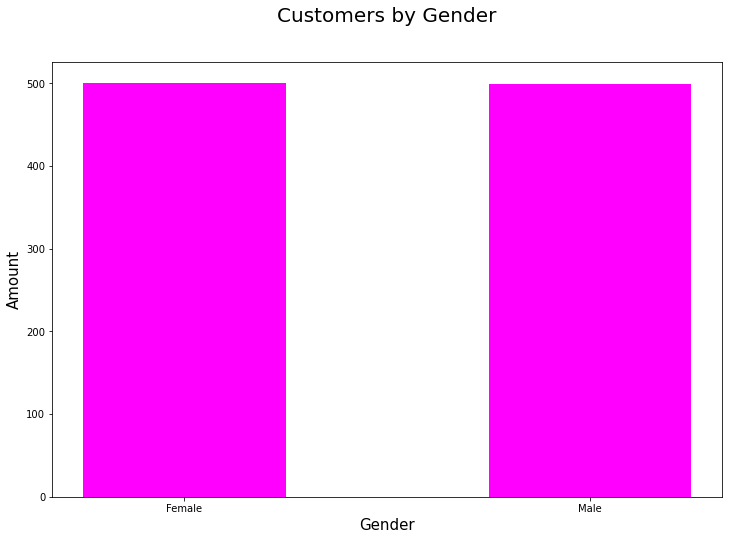

In [10]:
#Plotting Gender
gender_amount= dataset['Gender'].value_counts()
gender=dataset['Gender'].unique()
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(gender,gender_amount,width=0.5,label=gender,color='magenta')
plt.title('Customers by Gender', loc='center', pad=40, fontsize=20, color='black')
plt.ylabel('Amount', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.xticks(rotation = 0)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()

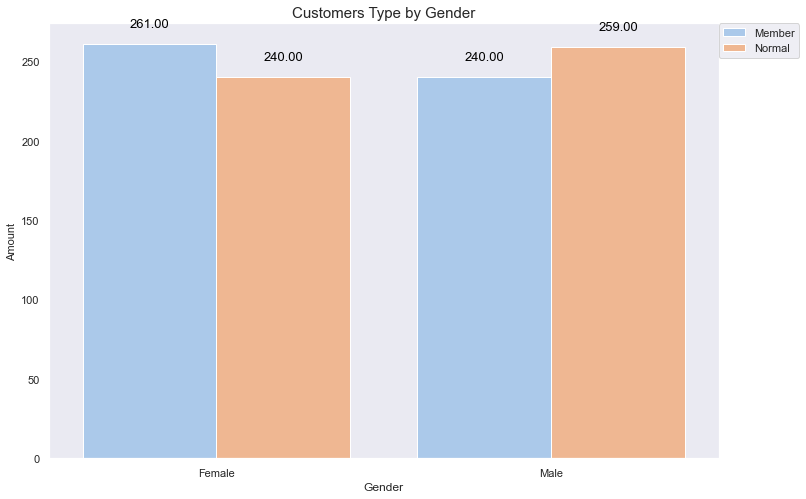

In [12]:
#Plotting Cust Type per Gender
groupby_gender = dataset.groupby(['Gender','Customer type'], as_index=False).size()
sns.set({'figure.figsize':(12,8)})
sns.set_theme(style='dark')
rects1 = sns.barplot(x='Gender',y='size',hue='Customer type',data=groupby_gender,palette='pastel')
rects1.set_title('Customers Type by Gender',fontsize=15)
rects1.set_ylabel('Amount',fontsize=11)
for p in rects1.patches:
    rects1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.legend(bbox_to_anchor=(1.12, 1),borderaxespad=0)
plt.show()

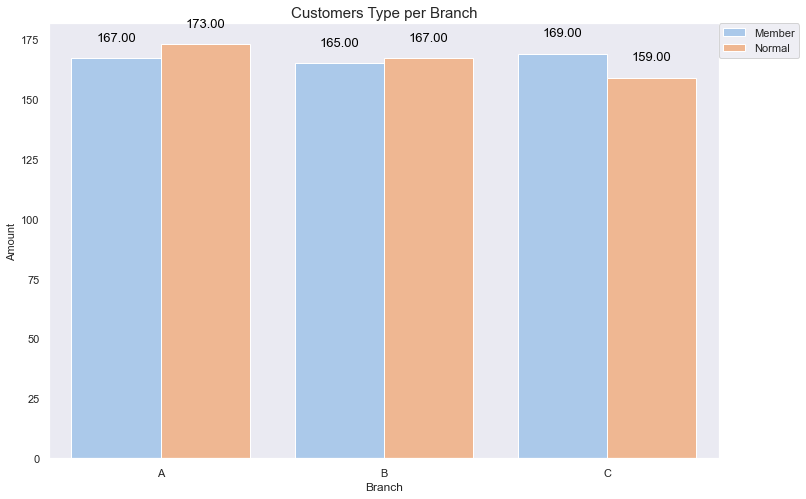

In [5]:
#Plotting Customer type per branch
groupby_payment = dataset.groupby(['Branch','Customer type'], as_index=False).size()
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
rects1 = sns.barplot(x='Branch',y='size',hue='Customer type',data=groupby_payment,palette='pastel')
plt.title('Customers Type per Branch',fontsize=15)
plt.ylabel('Amount',fontsize=11)
for p in rects1.patches:
    rects1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.legend(bbox_to_anchor=(1.12, 1),borderaxespad=0)
plt.show()

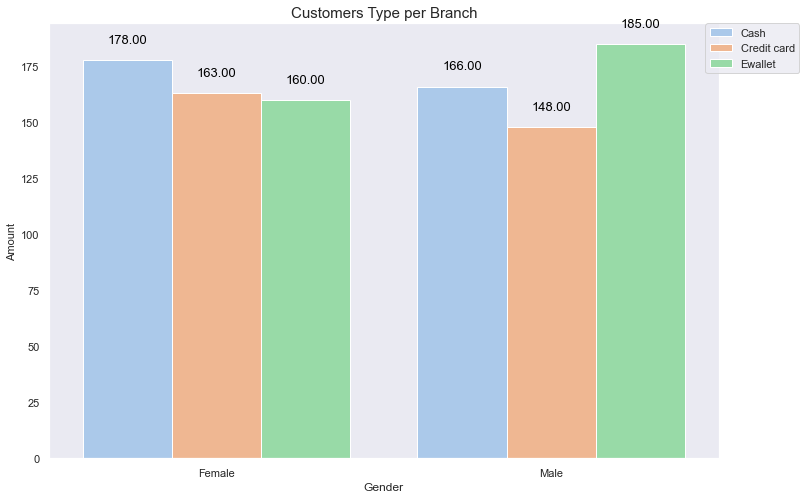

In [14]:
#Plotting Payment by Gender
groupby_paymentg = dataset.groupby(['Gender','Payment'], as_index=False).size()
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
rects1 = sns.barplot(x='Gender',y='size',hue='Payment',data=groupby_paymentg,palette='pastel')
plt.title('Payment per Gender',fontsize=15)
plt.ylabel('Amount',fontsize=11)
for p in rects1.patches:
    rects1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.legend(bbox_to_anchor=(1.12, 1),borderaxespad=0)
# plt.show()

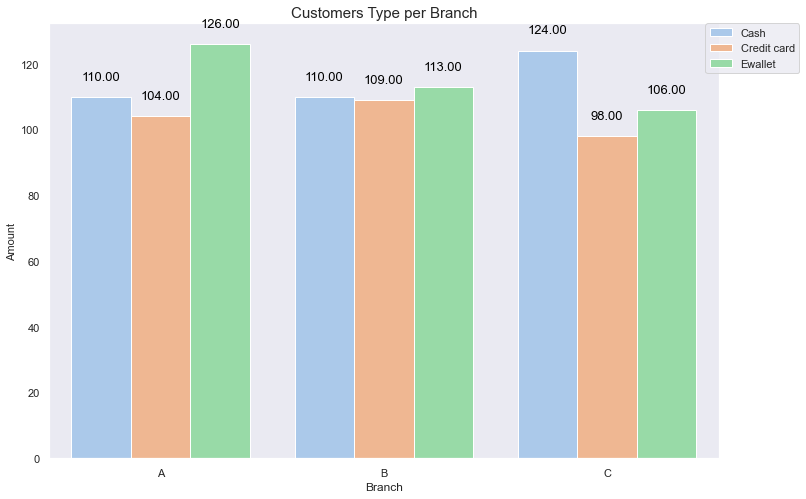

In [6]:
#Plotting Payment per branch
groupby_payment = dataset.groupby(['Branch','Payment'], as_index=False).size()
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
rects1 = sns.barplot(x='Branch',y='size',hue='Payment',data=groupby_payment,palette='pastel')
plt.title('Customers Type per Branch',fontsize=15)
plt.ylabel('Amount',fontsize=11)
for p in rects1.patches:
    rects1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.legend(bbox_to_anchor=(1.12, 1),borderaxespad=0)
plt.show()

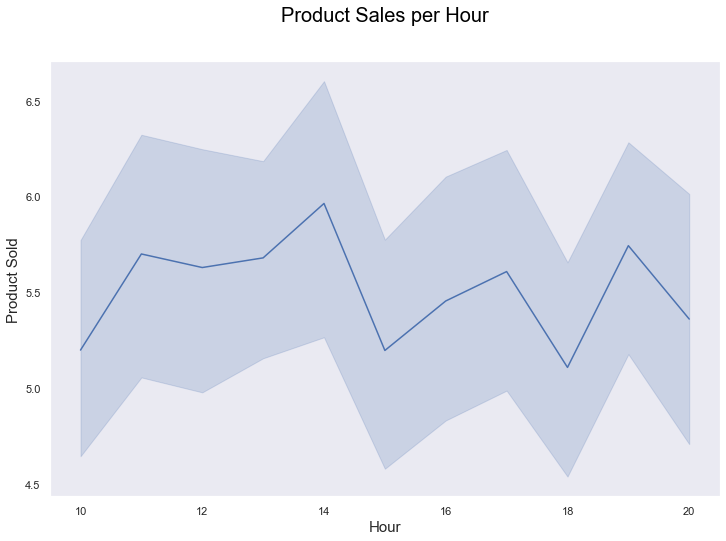

In [7]:
#PLotting Quantity by Hour
dataset['Time']=pd.to_datetime(dataset['Time'])
dataset['Hour']=(dataset['Time']).dt.hour
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
ax = sns.lineplot(x='Hour',y='Quantity',data=dataset)
ax.set_title('Product Sales per Hour', loc='center', pad=40, fontsize=20, color='black')
ax.set_ylabel('Product Sold', fontsize=15)
ax.set_xlabel('Hour', fontsize=15)
plt.show()

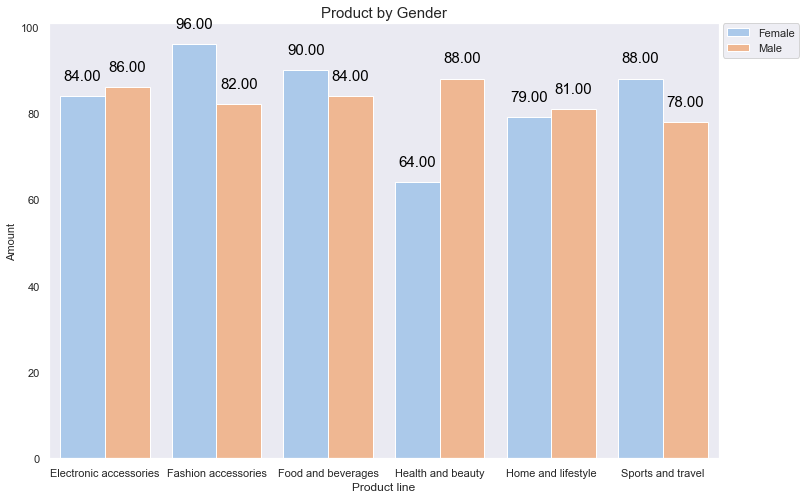

In [16]:
#Plotting product line by gender
groupby_productg = dataset.groupby(['Product line','Gender'], as_index=False).size()
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
rects1 = sns.barplot(x='Product line',y='size',hue='Gender',data=groupby_productg,palette='pastel')
plt.title('Product by Gender',fontsize=15)
plt.ylabel('Amount',fontsize=11)
for p in rects1.patches:
    rects1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.legend(bbox_to_anchor=(1.12, 1),borderaxespad=0)
plt.show()

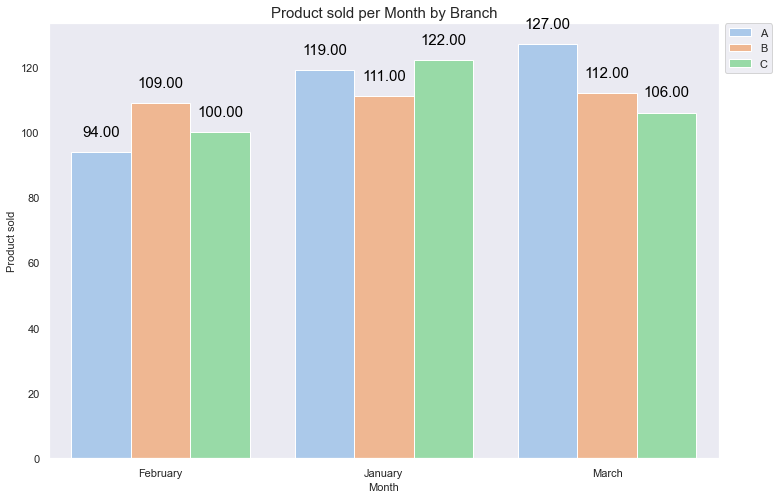

In [18]:
#Plotting Quantity per Month by Branch
q_month=dataset.groupby(['month_name','Branch'],as_index=False)['Quantity'].size()
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
rects1 = sns.barplot(x='month_name',y='size',hue='Branch',data=q_month,palette='pastel')
plt.title('Product sold per Month by Branch',fontsize=15)
plt.ylabel('Product sold',fontsize=11)
plt.xlabel('Month',fontsize=11)
for p in rects1.patches:
    rects1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.legend(bbox_to_anchor=(1.08, 1),borderaxespad=0)
plt.show()

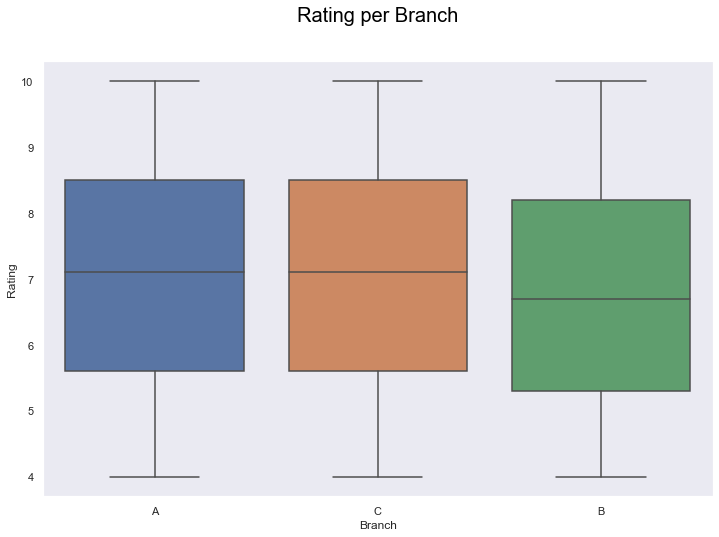

In [8]:
#Plotting Rating per Branch
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
ax = sns.boxplot(x='Branch',y='Rating',data=dataset)
ax.set_title('Rating per Branch',loc='center', pad=40, fontsize=20, color='black')
ax.set_ylabel('Rating', fontsize=12)
ax.set_xlabel('Branch', fontsize=12)
plt.show()

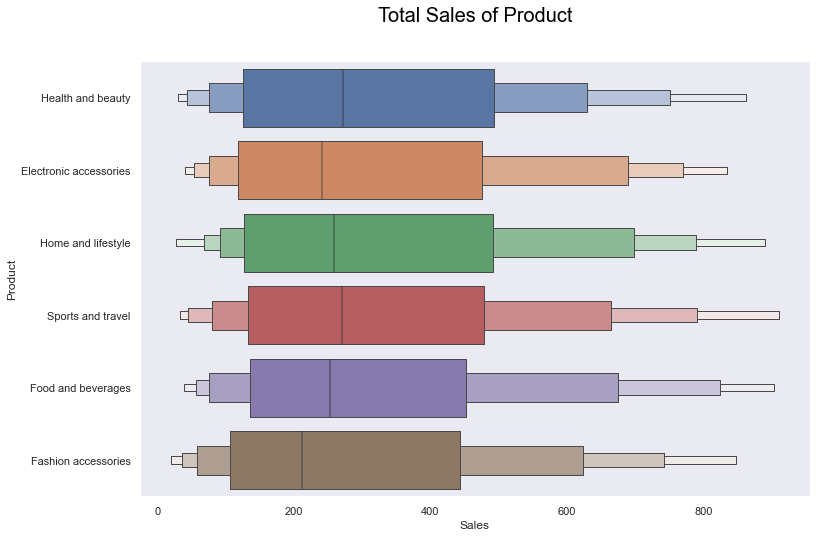

In [20]:
#PLotting Total per Product Line
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
ax = sns.boxenplot(x='Total',y='Product line',data=dataset, showfliers=False)
ax.set_title('Total Sales of Product',loc='center', pad=40, fontsize=20, color='black')
ax.set_ylabel('Product', fontsize=12)
ax.set_xlabel('Sales', fontsize=12)
plt.show()

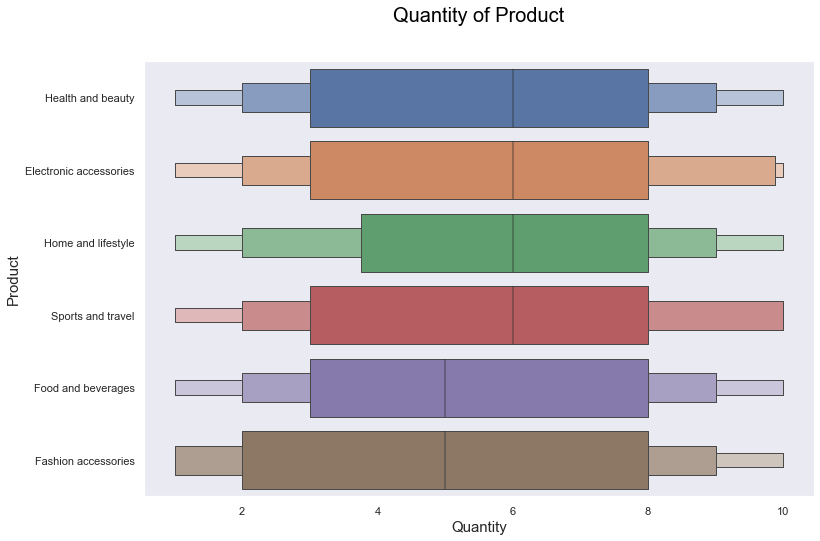

In [21]:
#Plotting Quantity of Product
plt.figure(figsize=(12,8))
sns.set_theme(style='dark')
ax = sns.boxenplot(x='Quantity',y='Product line',data=dataset)
ax.set_title('Quantity of Product',loc='center', pad=40, fontsize=20, color='black')
ax.set_ylabel('Product', fontsize=15)
ax.set_xlabel('Quantity', fontsize=15)
plt.show()